#  Recommendation System for Netflix Prize Dataset using SVD

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [2]:
df = pd.read_csv('combined_data_1.txt' )
df

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
1253504,3.0,2001-10-20
1376659,4.0,2004-01-19
365996,3.0,2004-02-13
174899,5.0,2005-07-25


In [3]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column



In [4]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [5]:
#To inspect the shape of the datset
dataset.shape



(3516240, 2)

In [6]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,159744
2.0,343474
3.0,986326
4.0,1219937
5.0,806089


In [8]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()[1]

movie_count

#4499 total number of movies present in dataset

670

In [9]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

384989

In [10]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

3515570

## To plot the distribution of the ratings in as a bar plot

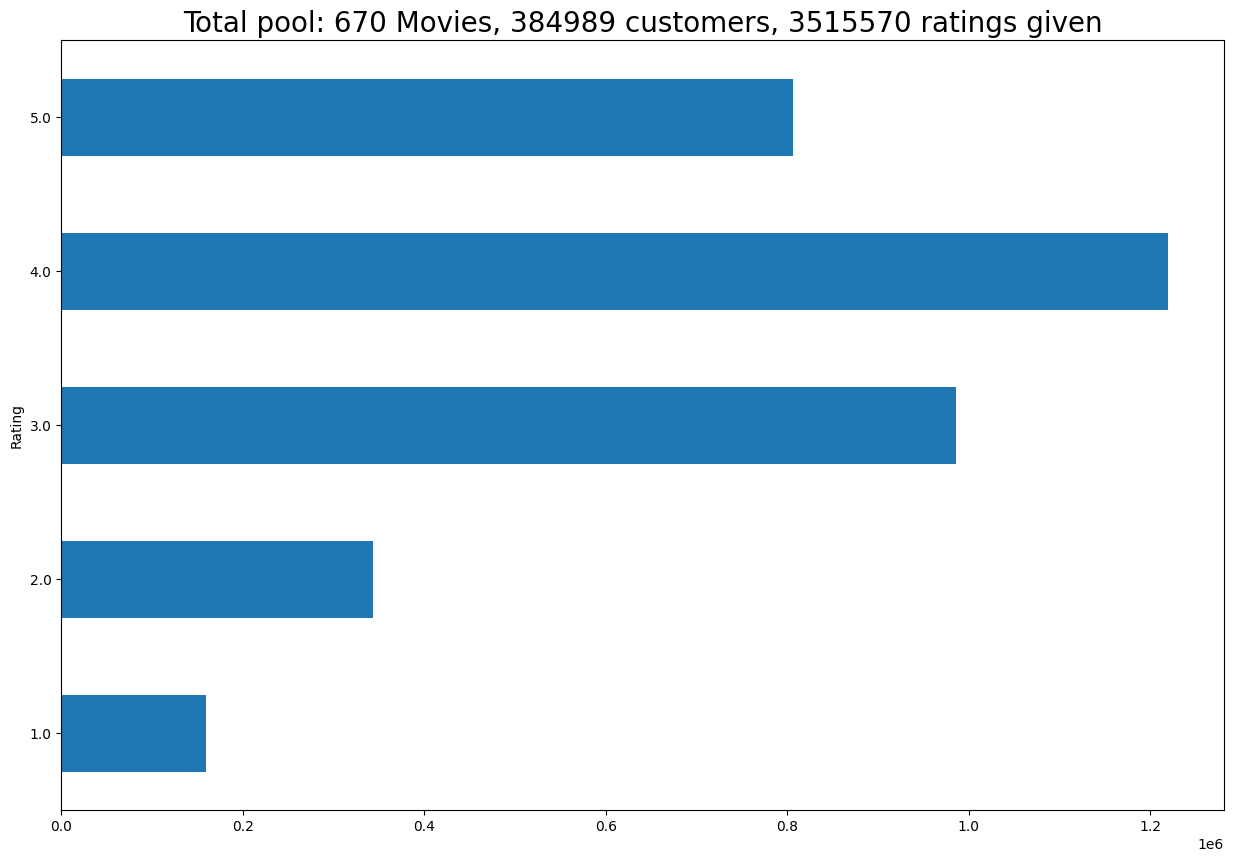

In [12]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()
#plt.axis('off')
#print--->print data  '' 'Total pool'

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [13]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [14]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(670, 1)

In [15]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
3501472,True
3501824,True
3502929,True
3509294,True


In [17]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [18]:
df_nan['index'][1:]

1          548
2          694
3         2707
4         2850
5         3991
        ...   
665    3501472
666    3501824
667    3502929
668    3509294
669    3509374
Name: index, Length: 669, dtype: int64

In [19]:
df_nan['index'][:-1]

0            0
1          548
2          694
3         2707
4         2850
        ...   
664    3501264
665    3501472
666    3501824
667    3502929
668    3509294
Name: index, Length: 669, dtype: int64

In [22]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 670. 670. 670.]
Length: 3515570


In [21]:
df_nan.iloc[-1, 0]

3509374

In [20]:
len(dataset)

3516240

In [ ]:
#x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [ ]:
#temp = np.full((1,547), 1)

In [ ]:
#print(temp)

In [ ]:
#tuple(x)

In [23]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


<ipython-input-23-949fa75c1e41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [24]:
dataset.tail()

,Cust_Id,Rating,Movie_Id
3516235,1063603,3.0,670
3516236,1639792,1.0,670
3516237,566240,3.0,670
3516238,385724,5.0,670
3516239,594340,5.0,670


In [27]:
dataset.shape

(3515570, 3)

# Data Cleaning

In [25]:
f = ['count','mean']
#count and mean

In [26]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 2033.0


In [28]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 10.0


In [29]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (3515570, 3)


In [30]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (2382555, 3)


In [ ]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [ ]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [ ]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To load the movie_titles dataset

In [ ]:
df_title = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [ ]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        16.9 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_4 --> 4.11.0-py38haa244fe_0




conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   |            |   0% 
conda-4.11.0         | 16.9 MB   | 5          |   6% 
conda-4.11.0         | 16.9 MB   | #1         |  11% 
conda-4.11.0         | 16.9 MB   | #5         |  15% 
conda-4.11.0         | 16.9 MB   | #9         |  20% 
conda-4.11.0         | 16.9 MB  

In [ ]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0037  0.9920  0.9975  0.9977  0.0048  
MAE (testset)     0.8083  0.7966  0.8039  0.8029  0.0048  
Fit time          3.79    3.64    3.71    3.72    0.06    
Test time         0.17    0.25    0.17    0.20    0.04    


{'test_rmse': array([1.0036749 , 0.99200842, 0.99751972]),
 'test_mae': array([0.80832566, 0.79661763, 0.80385189]),
 'fit_time': (3.7909035682678223, 3.641662836074829, 3.714344024658203),
 'test_time': (0.1735367774963379, 0.24933338165283203, 0.17453360557556152)}

In [ ]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [ ]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

# Train an SVD to predict ratings for user with userId = 1

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                            Name  Estimate_Score
4352  2002.0                  Curb Your Enthusiasm: Season 3        5.000000
2018  2004.0                                Samurai Champloo        5.000000
721   2003.0                              The Wire: Season 1        5.000000
241   1995.0  Neon Genesis Evangelion: The End of Evangelion        5.000000
871   1954.0                                   Seven Samurai        5.000000
174   1992.0                                  Reservoir Dogs        5.000000
2101  1994.0                          The Simpsons: Season 6        4.994354
4114  1999.0                         The Simpsons: Bart Wars        4.972430
2429  1979.0                      Alien: Collector's Edition        4.970744
404   1987.0                                 Wings of Desire        4.952919
